In [1]:
# Importing required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

### **Loading csv file**

In [64]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV/2.concerticcir1.csv",header=None) 
df.head()   

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


In [65]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [66]:
# Checking whether target variable is balanced or not
df[2].value_counts() 

1.0    50
0.0    50
Name: 2, dtype: int64

**Observation:**
- The data is balanced with 50% as 1 and 50% as 0.

### **Identifying Input and Output Features**

In [67]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int) 

In [68]:
x.head() 

,0,1
0,-0.382891,-0.090840
1,-0.020962,-0.477874
2,-0.396116,-1.289427
3,-0.618130,-0.063837
4,0.703478,-0.187038


### Split the data into train and test 

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

In [70]:
# Train and test shape
print(x_train.shape) 
print(x_test.shape)

(90, 2)
(10, 2)


### Standardizing Input features

In [71]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

### Rescaling numerical Input(train and test) features

In [72]:
# Fit and transform on train data
x_train=std.fit_transform(x_train)

# Transform on test data
x_test=std.transform(x_test)  

### **Building the Logical Structure**

In [73]:
# Importing libraries to build a neural network 
from keras import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization

from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

In [74]:
model=Sequential()
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(14,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(4,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid"))

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                48        
                                                                 
 dense_21 (Dense)            (None, 14)                238       
                                                                 
 dense_22 (Dense)            (None, 10)                150       
                                                                 
 dense_23 (Dense)            (None, 4)                 44        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 485 (1.89 KB)
Trainable params: 485 (1.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### compiling the model 

In [76]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=15,epochs=100,validation_split=0.1) 

Epoch 1/100
6/6 [==============================] - 1s 69ms/step - loss: 0.7016 - accuracy: 0.5185 - val_loss: 0.7083 - val_accuracy: 0.4444
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7013 - accuracy: 0.5185 - val_loss: 0.7070 - val_accuracy: 0.4444
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7006 - accuracy: 0.5185 - val_loss: 0.7060 - val_accuracy: 0.4444
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7001 - accuracy: 0.5432 - val_loss: 0.7051 - val_accuracy: 0.4444
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6997 - accuracy: 0.5432 - val_loss: 0.7035 - val_accuracy: 0.4444
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6991 - accuracy: 0.5556 - val_loss: 0.7030 - val_accuracy: 0.4444
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6989 - accuracy: 0.5432 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 8/100
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.6635 - accuracy: 0.7531 - val_loss: 0.6586 - val_accuracy: 0.6667
Epoch 60/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6625 - accuracy: 0.7531 - val_loss: 0.6576 - val_accuracy: 0.6667
Epoch 61/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6615 - accuracy: 0.7531 - val_loss: 0.6570 - val_accuracy: 0.6667
Epoch 62/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6608 - accuracy: 0.7531 - val_loss: 0.6560 - val_accuracy: 0.6667
Epoch 63/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6591 - accuracy: 0.7531 - val_loss: 0.6546 - val_accuracy: 0.6667
Epoch 64/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6581 - accuracy: 0.7407 - val_loss: 0.6535 - val_accuracy: 0.6667
Epoch 65/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6571 - accuracy: 0.7531 - val_loss: 0.6511 - val_accuracy: 0.6667
Epoch 66/100
6/6 [========

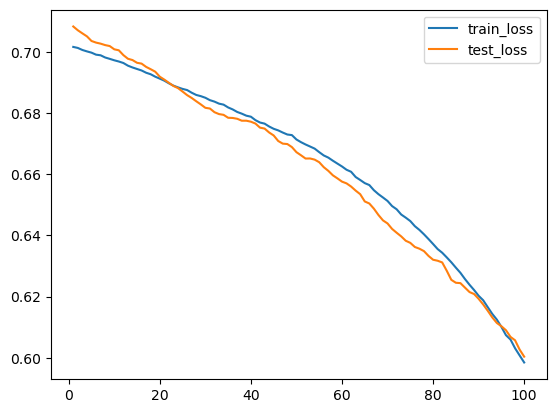

In [77]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend()

### Predicting the model 

In [78]:
predicted=model.predict(x_test) 
predicted 

1/1 [==============================] - 0s 123ms/step


array([[0.57213837],
       [0.53633904],
       [0.5394424 ],
       [0.52732444],
       [0.3696618 ],
       [0.43834078],
       [0.45689696],
       [0.26959583],
       [0.4760818 ],
       [0.51028496]], dtype=float32)

**Observation:**
- As predicted values are in probability values and we want predicted label either 1 or 0, if probability value is >0.5 then predicted label will be as 1 and if <= 0.5 then predicted label will be as 0.

In [79]:
predicted=np.where(predicted>0.5,1,0)
predicted  

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

### **Evaluating the model**

In [80]:
# Accuracy for the model
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print('Accuracy:',accuracy_score(y_test,predicted))

Accuracy: 0.9


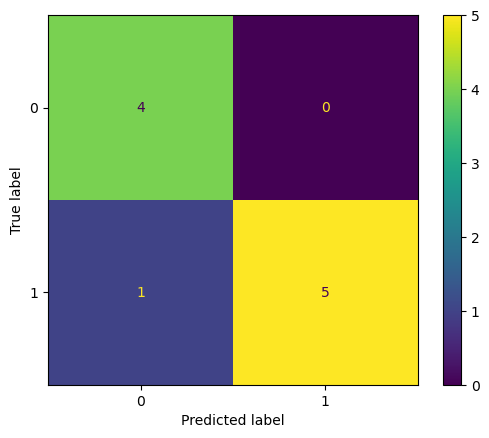

In [81]:
# Plotting confusion matrix to visual the correctly predicted labels
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

**Observation:**
- As diagonal elements should be as high as possible, We can conclude model predictions are correct.

### **PLOTING THE DECISION SURFACE**

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

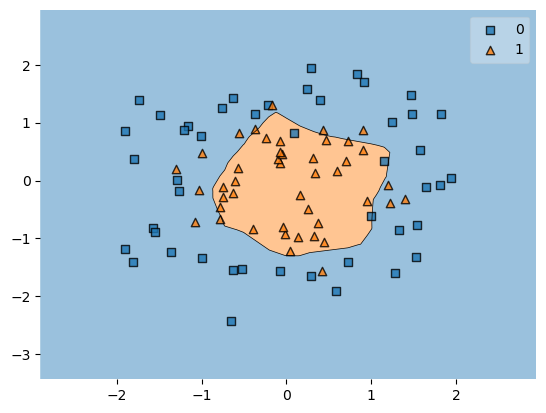

In [82]:
# Decision surface on train data
from mlxtend.plotting  import plot_decision_regions  
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

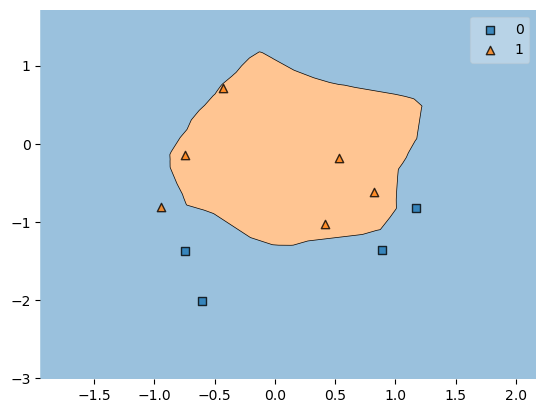

In [83]:
# Decision surface on test data
plot_decision_regions(x_test,y_test.values,clf=model)  

## **Conclusions:**
- This neural network model achieves an accuracy of around 90%. The model architecture consists of 4 hidden layers.
- In the first hidden layer, there are 16 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.
- In the second hidden layer, there are 14 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.
- In the third hidden layer, there are 10 neurons with the ReLU activation function and an L2 regularizer with learning rate as 0.001.

- The output layer uses the sigmoid activation function.

 
- **Overall, this neural network model architecture and training configuration achieve an accuracy of around 90%.**